# Problem 4.24 
Use Mathcad, Matlab, ect to solve Logan Problems. Find the rections, nodal displacement and plot the interpolated displacement for the beams
![title](images/P4.24.PNG)

In [1]:
# Import necessary packages

from matplotlib import pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
%matplotlib inline

In [2]:
# Initialize problem parameters

E = 29e6
I = 150
L = 10*12
w = 4000/12

global_stiffness_matrix = E*I/sp.Pow(L, 3)*sp.Matrix([[12, 6*L, -12, 6*L, 0, 0],\
                                     [6*L, 4*sp.Pow(L, 2), -6*L, 2*sp.Pow(L, 2), 0,0],
                                     [-12, -6*L, 24, 0, -12, 6*L],
                                     [6*L, 2*sp.Pow(L, 2), 0, 8*sp.Pow(L, 2), -6*L, 2*sp.Pow(L, 2)],
                                     [0, 0, -12, -6*L, 12, -6*L],
                                     [0, 0, 6*L, 2*sp.Pow(L, 2), -6*L, 4*sp.Pow(L, 2)]])
global_stiffness_matrix

⎡30208.3333333333    1812500.0   -30208.3333333333   1812500.0           0    
⎢                                                                             
⎢    1812500.0      145000000.0     -1812500.0      72500000.0           0    
⎢                                                                             
⎢-30208.3333333333  -1812500.0   60416.6666666667        0       -30208.333333
⎢                                                                             
⎢    1812500.0      72500000.0           0          290000000.0     -1812500.0
⎢                                                                             
⎢        0               0       -30208.3333333333  -1812500.0   30208.3333333
⎢                                                                             
⎣        0               0           1812500.0      72500000.0      -1812500.0

           0     ⎤
                 ⎥
           0     ⎥
                 ⎥
3333   1812500.0 ⎥
                 ⎥
      72500000.0

In [3]:
# Reduce stiffness matrix according to what is constrained

reduced_stiffness_matrix = global_stiffness_matrix[3:, 3:]
reduced_stiffness_matrix

⎡290000000.0     -1812500.0     72500000.0 ⎤
⎢                                          ⎥
⎢-1812500.0   30208.3333333333  -1812500.0 ⎥
⎢                                          ⎥
⎣72500000.0      -1812500.0     145000000.0⎦

In [4]:
# Generate equivalent node forces for distributed loads

F_reduced_equivalent_nodal_forces = sp.Matrix([[-w*sp.Pow(L, 2)/30],\
                                              [-17*w*L/40],
                                              [w*sp.Pow(L,2)/15]])
F_reduced_equivalent_nodal_forces

⎡-160000.0⎤
⎢         ⎥
⎢-17000.0 ⎥
⎢         ⎥
⎣320000.0 ⎦

In [5]:
# Calculate displacements that are not constrained

non_constrained_displacements = reduced_stiffness_matrix.LUsolve(F_reduced_equivalent_nodal_forces)
non_constrained_displacements

⎡-0.0129655172413793⎤
⎢                   ⎥
⎢ -3.27724137931034 ⎥
⎢                   ⎥
⎣-0.0322758620689655⎦

In [6]:
# Calculate actual reaction forces

global_displacements = sp.Matrix([0, 0, 0, non_constrained_displacements])
effective_forces = global_stiffness_matrix*global_displacements
equivalent_nodal_forces = sp.Matrix([-3*w*L/40,\
                                    -w*sp.Pow(L, 2)/60,
                                    -w*L/2,
                                    F_reduced_equivalent_nodal_forces])
F = effective_forces - equivalent_nodal_forces
F

⎡      -20500.0       ⎤
⎢                     ⎥
⎢  -859999.999999999  ⎥
⎢                     ⎥
⎢       60500.0       ⎥
⎢                     ⎥
⎢          0          ⎥
⎢                     ⎥
⎢-3.63797880709171e-12⎥
⎢                     ⎥
⎣          0          ⎦

In [7]:
# Interpolate from nodal displacements according to shape functions

def calculate_interpolated_displacement(x_data, length, v_1, phi_1, v_2, phi_2):
    N1 = (1/(L**3))*(2*x_data**3 - 3*x_data**2*L + L**3)
    N2 = (1/(L**3))*(L*x_data**3 - 2*L**2*x_data**2 + x_data*L**3)
    N3 = (1/(L**3))*(-2*x_data**3 + 3*L*x_data**2)
    N4 = (1/(L**3))*(L*x_data**3 - x_data**2*L**2)
    return N1*v_1 + N2*phi_1 + N3*v_2 + N4*phi_2

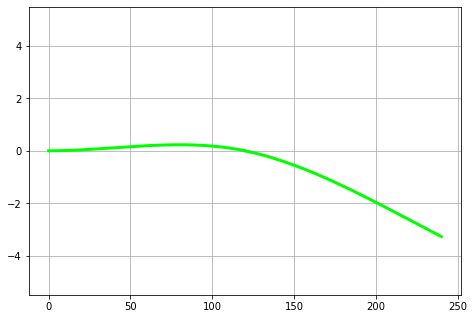

In [8]:
# Plot interpolated displacements

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x = np.arange(0, L, 0.1)
beam_element_1_displacement = calculate_interpolated_displacement(x, L, 0, 0, 0, non_constrained_displacements[0])
beam_element_2_displacement = calculate_interpolated_displacement(x, L, 0, non_constrained_displacements[0], non_constrained_displacements[1], non_constrained_displacements[2])
linewidth = 3
ax.plot(x, beam_element_1_displacement, color='lime', linewidth=linewidth)
ax.plot(x+L, beam_element_2_displacement, color='lime', linewidth=linewidth)
plt.ylim(-5.5, 5.5)
ax.grid(True)

# Problem 4.29
Use Mathcad, Matlab, ect to solve Logan Problem 4.29. Find the rections, nodal displacement and plot the interpolated displacement for the beam. Also plot the stress along the beam and confirm with CREO
![title](images/P4.29.PNG)

In [9]:
# Initialize problem parameters

E, I, L, P, w = sp.symbols('E, I, L, P, w')
E = 30e6
I = 500
L = 30*12
P = 60e3
w = 1000/12

k_1 = ((E*3*I)/sp.Pow(L, 3))*sp.Matrix([[12, 6*L, -12, 6*L],\
                                        [6*L, 4*sp.Pow(L, 2), -6*L, 2*sp.Pow(L, 2)],
                                        [-12, -6*L, 12, -6*L],
                                        [6*L, 2*sp.Pow(L, 2), -6*L, 4*sp.Pow(L, 2)]])
k_2 = ((E*I)/sp.Pow(L, 3))*sp.Matrix([[12, 6*L, -12, 6*L],\
                                      [6*L, 4*sp.Pow(L, 2), -6*L, 2*sp.Pow(L, 2)],
                                      [-12, -6*L, 12, -6*L],
                                      [6*L, 2*sp.Pow(L, 2), -6*L, 4*sp.Pow(L, 2)]])

In [10]:
# Generate global stiffness matrix for this problem

global_stiffness_matrix = sp.zeros(6, 6)
global_stiffness_matrix[0:4, 0:4] = global_stiffness_matrix[0:4, 0:4] + k_1
global_stiffness_matrix[2:6, 2:6] = global_stiffness_matrix[2:6, 2:6] + k_2
global_stiffness_matrix

⎡11574.0740740741   2083333.33333333   -11574.0740740741  2083333.33333333    
⎢                                                                             
⎢2083333.33333333      500000000.0     -2083333.33333333     250000000.0      
⎢                                                                             
⎢-11574.0740740741  -2083333.33333333  15432.0987654321   -1388888.88888889  -
⎢                                                                             
⎢2083333.33333333      250000000.0     -1388888.88888889  666666666.666667   -
⎢                                                                             
⎢        0                  0          -3858.02469135802  -694444.444444444  3
⎢                                                                             
⎣        0                  0          694444.444444444   83333333.3333333   -

       0                  0        ⎤
                                   ⎥
       0                  0        ⎥
                   

In [11]:
# construct reduced stiffness matrix (manually cause I'm running out of time)

k_reduced = sp.zeros(3, 3)
k_reduced[0, 0] = global_stiffness_matrix[1, 1]
k_reduced[0, 1] = global_stiffness_matrix[1, 3]
k_reduced[0, 2] = global_stiffness_matrix[1, 5]
k_reduced[1, 0] = global_stiffness_matrix[3, 1]
k_reduced[1, 1] = global_stiffness_matrix[3, 3]
k_reduced[1, 2] = global_stiffness_matrix[3, 5]
k_reduced[2, 0] = global_stiffness_matrix[5, 1]
k_reduced[2, 1] = global_stiffness_matrix[5, 3]
k_reduced[2, 2] = global_stiffness_matrix[5, 5]
k_reduced

⎡500000000.0    250000000.0            0        ⎤
⎢                                               ⎥
⎢250000000.0  666666666.666667  83333333.3333333⎥
⎢                                               ⎥
⎣     0       83333333.3333333  166666666.666667⎦

In [12]:
# Generate equivalent node forces for distributed loads

F_reduced_equivalent_nodal_forces = sp.Matrix([-P*L/8, -w*sp.Pow(L, 2)/12 + P*L/8, w*sp.Pow(L, 2)/12])
F_reduced_equivalent_nodal_forces

⎡-2700000.0⎤
⎢          ⎥
⎢1800000.0 ⎥
⎢          ⎥
⎣ 900000.0 ⎦

In [13]:
# Calculate displacements that are not constrained

non_constrained_displacements = k_reduced.LUsolve(F_reduced_equivalent_nodal_forces)
non_constrained_displacements

⎡-0.0081⎤
⎢       ⎥
⎢0.0054 ⎥
⎢       ⎥
⎣0.0027 ⎦

In [14]:
# Calculate all displacements

global_displacements = sp.Matrix([0,\
                                  non_constrained_displacements[0],
                                  0,
                                  non_constrained_displacements[1],
                                  0,
                                  non_constrained_displacements[2]])
effective_forces = global_stiffness_matrix*global_displacements
equivalent_nodal_forces = sp.Matrix([-P/2,
                                    -P*L/8,
                                    -P/2 - w*L/2,
                                    -w*sp.Pow(L, 2)/12 + P*L/8,
                                    -w*L/2,
                                    w*sp.Pow(L, 2)/12])
global_displacements

⎡   0   ⎤
⎢       ⎥
⎢-0.0081⎥
⎢       ⎥
⎢   0   ⎥
⎢       ⎥
⎢0.0054 ⎥
⎢       ⎥
⎢   0   ⎥
⎢       ⎥
⎣0.0027 ⎦

In [15]:
# Calculate actual reaction forces

F = effective_forces - equivalent_nodal_forces
F

⎡       24375.0       ⎤
⎢                     ⎥
⎢-4.65661287307739e-10⎥
⎢                     ⎥
⎢       56250.0       ⎥
⎢                     ⎥
⎢-2.3283064365387e-10 ⎥
⎢                     ⎥
⎢       9375.0        ⎥
⎢                     ⎥
⎣          0          ⎦

$R_a = 24.4\,kip \qquad R_b = 56.3\,kip \qquad R_c=9.38\,kip$

max displacement is 0.613458658854167 in.


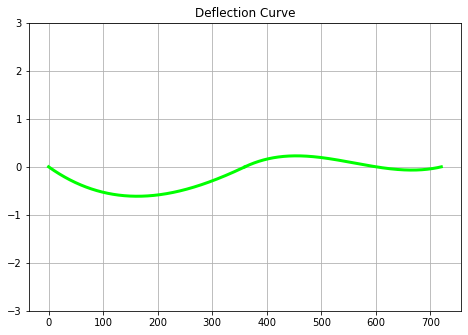

In [19]:
# Plot interpolated deflections

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x = np.arange(0, L, 0.1)
beam_element_1_displacement = calculate_interpolated_displacement(x, L, 0, non_constrained_displacements[0], 0, non_constrained_displacements[1])
beam_element_2_displacement = calculate_interpolated_displacement(x, L, 0, non_constrained_displacements[1], 0, non_constrained_displacements[2])
max_displacement = np.amax(np.abs(beam_element_1_displacement))
max_test = np.amax(np.abs(beam_element_1_displacement))
if max_test > max_displacement:
    max_displacement = max_test
print("max displacement is {} in.".format(max_test))
linewidth = 3
ax.plot(x, beam_element_1_displacement, color='lime', linewidth=linewidth)
ax.plot(x+L, beam_element_2_displacement, color='lime', linewidth=linewidth)
ax.set_title('Deflection Curve')
plt.ylim(-3, 3)
ax.grid(True)